In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

In [ ]:
(X_train,y_train),(X_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=12,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/12
1563/1563 [==============================] - 23s 7ms/step - loss: 1.6146 - accuracy: 0.4033 - val_loss: 1.2745 - val_accuracy: 0.5451
Epoch 2/12
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2464 - accuracy: 0.5541 - val_loss: 1.0794 - val_accuracy: 0.6245
Epoch 3/12
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0939 - accuracy: 0.6099 - val_loss: 0.9571 - val_accuracy: 0.6671
Epoch 4/12
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9953 - accuracy: 0.6474 - val_loss: 0.8883 - val_accuracy: 0.6913
Epoch 5/12
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9362 - accuracy: 0.6699 - val_loss: 0.8184 - val_accuracy: 0.7136
Epoch 6/12
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8796 - accuracy: 0.6914 - val_loss: 0.8115 - val_accuracy: 0.7170
Epoch 7/12
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8518 - accuracy: 0.7006 - val_loss: 0.8093 - val_accu

In [ ]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4384

In [ ]:
model.save_weights("model_weight.h5")

In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [ ]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck",
]

In [ ]:
f=Path("model_structure.json")
model_structure=f.read_text()

In [ ]:
model=model_from_json(model_structure)

In [ ]:
model.load_weights("model_weight.h5")

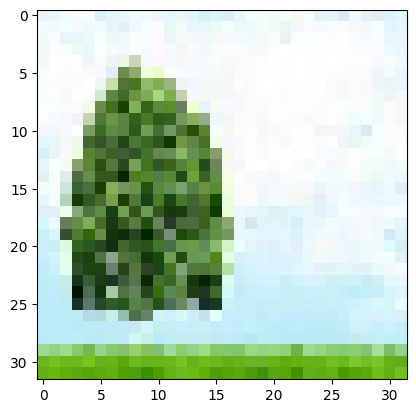

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img=load_img("Tree.png",target_size=(32,32))
plt.imshow(img)

In [ ]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

In [ ]:
list_of_images=np.expand_dims(image_to_test,axis=0)

In [ ]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 20ms/step


In [ ]:
single_result=results[0]

In [ ]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

In [ ]:
class_label=class_labels[most_likely_class_index]

In [ ]:
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a Truck likelihood: 1.000000
